In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.expand_frame_repr',False)
pd.set_option('max_colwidth',1)

In [86]:
df = pd.read_csv(r"C:\Users\ANAIKUTTY\Documents\Cricket analysis\data files\IPL_ball_by_ball_updated.csv")

In [87]:
df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [88]:
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,2.7,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
df['innings'].unique()

array([2, 1, 4, 3, 6, 5])

In [90]:
df = df[df['innings'] <= 2]

In [91]:
df['innings'].unique()

array([2, 1])

In [92]:
df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
ab_df = df[(df['striker'] == 'AB de Villiers') & (df['bowler'] == 'JJ Bumrah')]

In [94]:
ab_df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
95889,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,11.5,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
sum(ab_df['runs_off_bat'])

125

In [96]:
ab_df['ball'].count()

np.int64(86)

In [97]:
100 * sum(ab_df['runs_off_bat']) / ab_df['ball'].count()

np.float64(145.34883720930233)

In [98]:
allbat_vs_boom = df[df['bowler'] == 'JJ Bumrah']

In [99]:
#llbat_vs_boom.groupby('striker').agg({'runs_off_bat':'sum','ball':'count'})

In [100]:
bdf1 = pd.DataFrame(allbat_vs_boom.groupby('striker')['runs_off_bat'].sum())


In [101]:
bdf2 = pd.DataFrame(allbat_vs_boom.groupby('striker')['ball'].count())

In [102]:
bdf3 = bdf1.merge(bdf2, on='striker',how='left')

In [103]:
bdf3.reset_index(inplace=True)

In [104]:
bdf3.head()

,striker,runs_off_bat,ball
0,A Badoni,3,5
1,A Mishra,1,5
2,AB de Villiers,125,86
3,AD Nath,4,4
4,AD Russell,56,45


In [105]:
bdf3 = bdf3[bdf3['ball'] >= 30]

In [106]:
bdf3['strikerate'] = 100*bdf3['runs_off_bat'] / bdf3['ball']

In [107]:
bdf3.head()

,striker,runs_off_bat,ball,strikerate
2,AB de Villiers,125,86,145.348837
4,AD Russell,56,45,124.444444
9,AM Rahane,49,41,119.512195
10,AR Patel,40,42,95.238095
13,AT Rayudu,60,44,136.363636


In [108]:
bdf3 = bdf3.reset_index(drop=True)

In [109]:
bdf3.head()

,striker,runs_off_bat,ball,strikerate
0,AB de Villiers,125,86,145.348837
1,AD Russell,56,45,124.444444
2,AM Rahane,49,41,119.512195
3,AR Patel,40,42,95.238095
4,AT Rayudu,60,44,136.363636


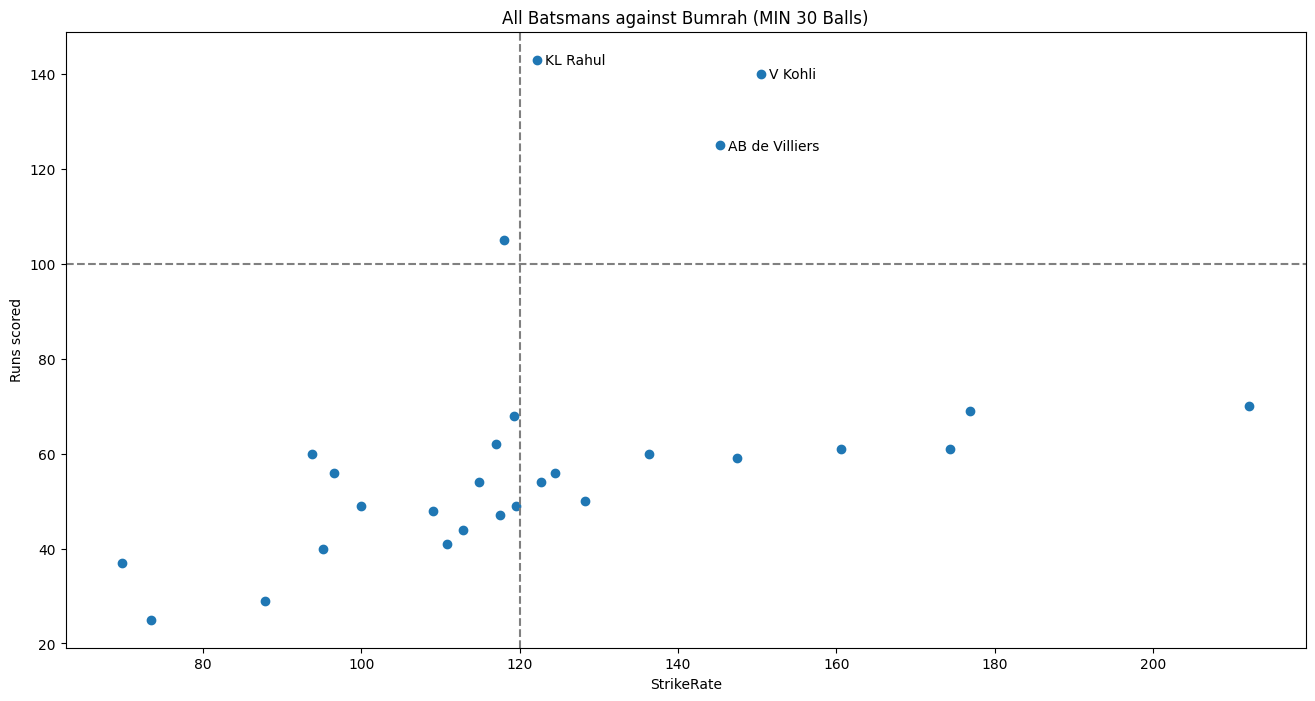

In [110]:
plt.figure(figsize=(16,8))
plt.scatter(bdf3['strikerate'] , bdf3['runs_off_bat'])
plt.title("All Batsmans against Bumrah (MIN 30 Balls)")
plt.xlabel("StrikeRate")
plt.ylabel("Runs scored")

for i in range(len(bdf3)):
    if ((bdf3['runs_off_bat'][i] >=100) & (bdf3['strikerate'][i] >=120)):
        plt.text(bdf3['strikerate'][i] +1, bdf3['runs_off_bat'][i] -1,bdf3['striker'][i])

plt.axvline(120,ls='--', color='grey')
plt.axhline(100,ls='--', color='grey')
plt.show()


In [111]:
allbowl_vs_abde = df[df['striker']=='AB de Villiers']

In [112]:
bdf4 = pd.DataFrame(allbowl_vs_abde.groupby('bowler')['runs_off_bat'].sum())
bdf5 = pd.DataFrame(allbowl_vs_abde.groupby('bowler')['ball'].count())
bdf6 = bdf4.merge(bdf5, on='bowler' ,how='left')

In [113]:
bdf6 = bdf6.reset_index()

In [114]:
bdf6.head()

,bowler,runs_off_bat,ball
0,A Ashish Reddy,46,18
1,A Chandila,26,11
2,A Flintoff,34,12
3,A Kumble,39,41
4,A Mishra,40,37


In [115]:
bdf6['economy'] = 6*bdf6['runs_off_bat'] / bdf6['ball']

In [148]:
bdf6 = bdf6[bdf6['ball'] >= 30]
bdf6 = bdf6.reset_index(drop=True)

In [149]:
bdf6.head()

,bowler,runs_off_bat,ball,economy
0,A Kumble,39,41,5.707317
1,A Mishra,40,37,6.486486
2,AD Russell,87,39,13.384615
3,AR Patel,71,70,6.085714
4,B Kumar,68,43,9.488372


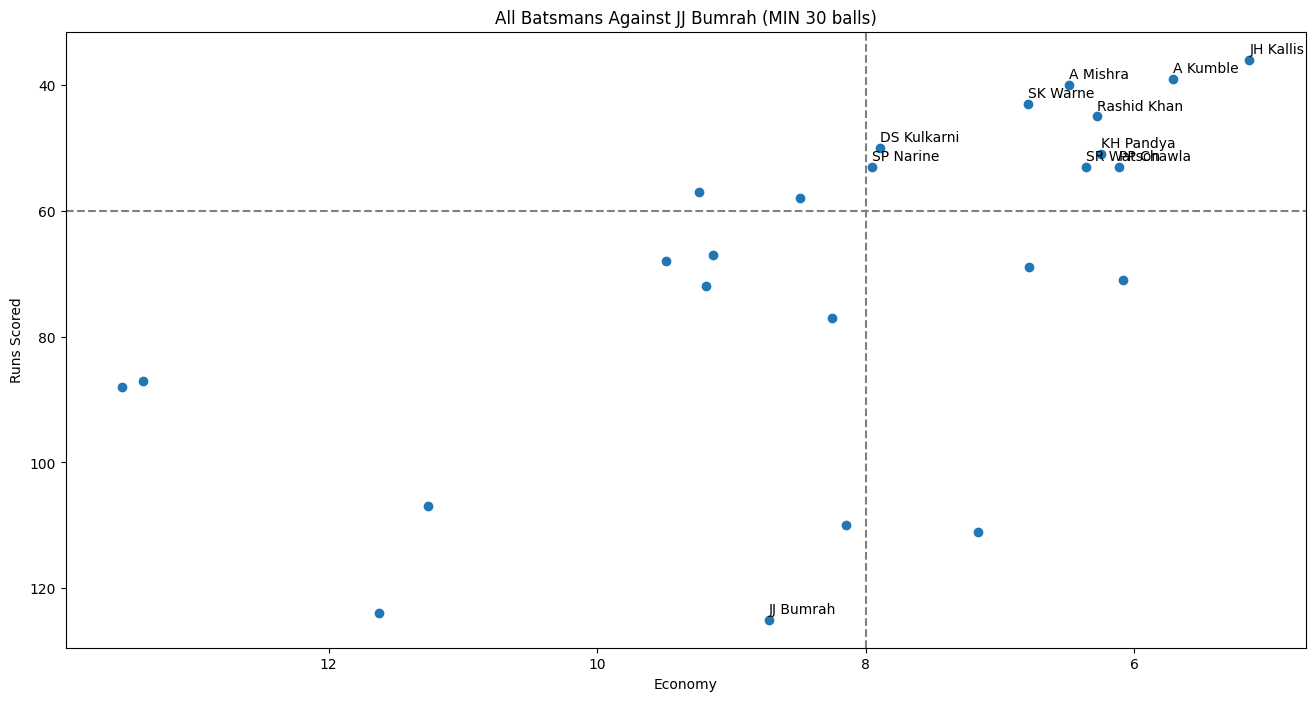

In [150]:
plt.figure(figsize=(16,8))
plt.scatter(bdf6['economy'],bdf6['runs_off_bat'])
plt.gca().xaxis.set_inverted(True)
plt.gca().yaxis.set_inverted(True)
for i in range(len(bdf6)):
        if (bdf6['bowler'][i] == 'JJ Bumrah'):
                plt.text(bdf6['economy'][i] ,bdf6['runs_off_bat'][i] -1 ,bdf6['bowler'][i])
        if ((bdf6['economy'][i] <=8) & (bdf6['runs_off_bat'][i] <= 60)):
                plt.text(bdf6['economy'][i] ,bdf6['runs_off_bat'][i] -1 ,bdf6['bowler'][i])


plt.title("All Batsmans Against JJ Bumrah (MIN 30 balls)")
plt.xlabel("Economy")
plt.ylabel("Runs Scored")
plt.axvline(8, ls='--',color='grey')
plt.axhline(60, ls='--',color='grey')
plt.show()